# ESO 137-001

ESO 137-001 is a barred spiral galaxy located in the Norma Cluster (ACO 3627 or Abell 3627), approximately 220 million light-years away in the constellation Triangulum Australe. It is best known for its spectacular tail of ionized gas, making it a striking example of ram pressure stripping—a process where the galaxy’s gas is stripped away due to its movement through the hot intracluster medium (ICM).


<img src="images/ESO_137_001.png" width="400"/>

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

# Open the FITS file and load data
with fits.open("DATA/eso137_subcube.fits") as hdul:
    hdul.info()  # Shows a summary of the FITS file

    print('\n')
    header_0 = hdul[0].header
    for card in header_0.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")  
    
    print('\n')
    header_1 = hdul[1].header
    for card in header_1.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")

    print('\n')
    header_2 = hdul[2].header
    for card in header_2.cards:
        print(f"{card[0]:<8} = {card[1]} / {card[2]}")
        
    # Load data
    cube = hdul[1].data 
    var = hdul[2].data 

# Generate the wavelength array
channels = np.arange(0, header_1['NAXIS3'], 1)
w = header_1['CRVAL3'] + channels * header_1['CD3_3']   # wavelength in angstrom

cube_units = 1e-20
var_units = 1e-40

wcs_dict = {
    'CTYPE1': 'RA---TAN', 'CUNIT1': 'deg', 'CRVAL1': 243.3596071 , 
    "CRPIX1": 157.0972270613, "CD1_1": -5.5555555555556e-05, "CD1_2": 0.0,
    "CTYPE2": "DEC--TAN", "CUNIT2": "deg", "CRVAL2": -60.7622477, 
    "CRPIX2": 171.01434801072, "CD2_1": 0.0, "CD2_2": 5.5555555555556e-05,
}

# In this case the tangential projection gives just a small correction, because the FOV is small
wcs = WCS(wcs_dict)

naxis1, naxis2 = header_1['NAXIS1'], header_1['NAXIS2']

ra_min, dec_min = wcs.all_pix2world([[0, 0]], 0)[0]
ra_max, dec_max = wcs.all_pix2world([[naxis1, naxis2]], 0)[0]

Filename: DATA/eso137_subcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  DATA          1 ImageHDU        42   (321, 321, 3681)   float32   
  2  STAT          1 ImageHDU        42   (321, 321, 3681)   float32   


SIMPLE   = True / file does conform to FITS standard
BITPIX   = 8 / number of bits per data pixel
NAXIS    = 0 / number of data axes
EXTEND   = True / FITS dataset may contain extensions
COMMENT  =   FITS (Flexible Image Transport System) format is defined in 'Astronomy / 
COMMENT  =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H / 
DATE     = 2020-09-29T03:23:23 / file creation date (YYYY-MM-DDThh:mm:ss UT)
ORIGIN   = ESO-PARANAL / European Southern Observatory
TELESCOP = ESO-VLT-U4 / ESO <TEL>
INSTRUME = MUSE / Instrument used.
RA       = 243.326611 / [deg] 16:13:18.3 RA (J2000) pointing
DEC      = -60.7304 / [deg] -60:43:49.4 DEC (J2000) pointing
EQUINOX  = 2000.0 / Sta

In [3]:

# Sum of spectra along spatial axes, resulting in a 1D spectrum
summed_spectra = np.nansum(cube, axis=(1, 2))


In [4]:

# Total intensity map by summing along the spectral axis
summed_var = np.nansum(cube, axis=(1,2))

/tmp/ipykernel_18821/3652938577.py:6: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(w, summed_spectra*cube_units, yerr=np.sqrt(summed_var*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5,linestyle='-')


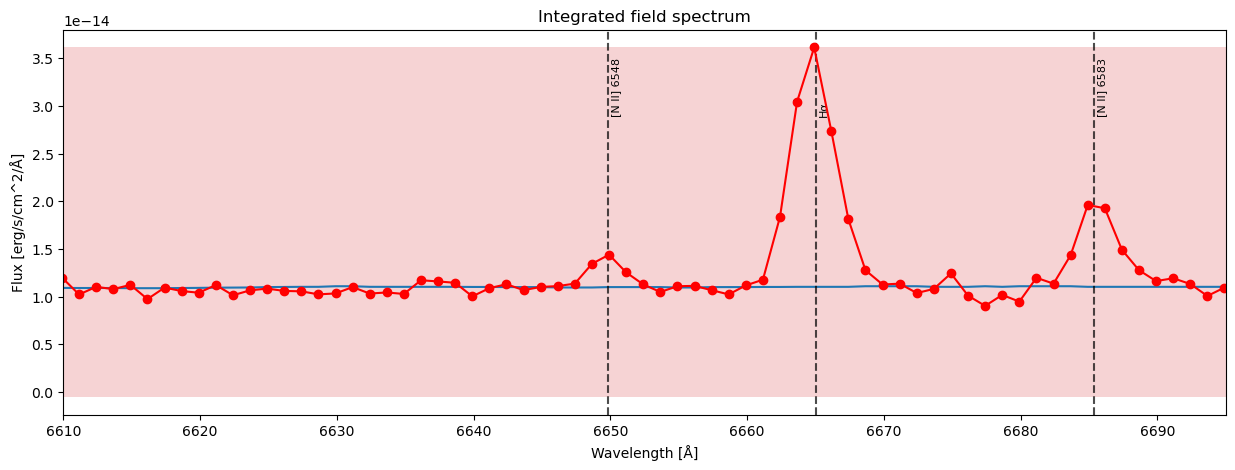

In [4]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,5))
plt.title("Integrated field spectrum")

plt.errorbar(w, summed_spectra*cube_units, yerr=np.sqrt(summed_var*var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5,linestyle='-')

from scipy.ndimage import median_filter
continuum = median_filter(summed_spectra, size=101,mode="nearest")  # Choose an odd kernel size
plt.plot(w,continuum*cube_units)

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm^2/Å]")

# Define UBVRI filter wavelength ranges (in Angstrom)
filters = {
    "U": (3200, 4000),
    "B": (4000, 5000),
    "V": (5000, 6000),
    "R": (6000, 7000),
    "I": (7000, 9000),
}

min = np.min(summed_spectra*cube_units)
max = np.max(summed_spectra*cube_units)
# Add vertical shaded regions corresponding to the filters
for name, (wmin, wmax) in filters.items():
    plt.fill_betweenx([min, max], wmin, wmax, alpha=0.2, label=f"{name} filter")
    
z_Abell = 0.01555

# Define important emission/absorption lines in galaxies
# Define important emission/absorption lines in galaxies
spectral_lines = {
    # Optical Lines
    "O II (Doublet)": 3727,
    "Hγ": 4340,
    "Hδ": 4102,
    "Hβ": 4861,
    "[O III] 4959": 4959,
    "[O III] 5007": 5007,
    "He II 4686": 4686,
    "He I 4471": 4471,
    "He I 5876": 5876,
    "Hα": 6563,
    "[N II] 6548": 6548,
    "[N II] 6583": 6583,
    "[S II] 6716": 6716,
    "[S II] 6731": 6731,
    "[Ar III] 7136": 7136,
    "[Fe II] 5159": 5159,

    # Calcium Lines
    "[Ca II] 8498": 8498,
    "[Ca II] 8542": 8542,
    "[Ca II] 8662": 8662,
    "Ca H": 3968,
    "Ca K": 3934,

    # Magnesium and Sodium Lines
    "Mg I 5175": 5175,
    "Na I D (Doublet)": 5890,  # Doublet at 5890 and 5896 Å
}
# Apply redshift correction to each spectral line
redshifted_lines = {name: wavelength * (1 + z_Abell) for name, wavelength in spectral_lines.items()}

# Add vertical dashed lines for spectral features
for name, wavelength in redshifted_lines.items():
    plt.axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
    plt.text(wavelength + 0.2, max * 0.8, name, 
             rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)

#plt.xlim(4750.15,7500)
#plt.xlim(6850,6900)
plt.xlim(6610,6695)



plt.show()


In [5]:
crval3 = header_1['CRVAL3']
dw = header_1['CD3_3'] 
Ha_channel_inf = int((6660 - crval3)/dw)
Ha_channel_sup = int((6670 - crval3)/dw)
continuum_channel_inf = int((6620 - crval3)/dw)
continuum_channel_sup = int((6630 - crval3)/dw)

units = 1e-20 * 50 / ( cdelt1 * 3600 )**2   # integrating on wavelength, per arcsec^2

integrated_Ha_continuum = np.nansum(cube[Ha_channel_inf:Ha_channel_sup, :, :],axis=0) * units
integrated_continuum_near_Ha = np.nansum(cube[continuum_channel_inf:continuum_channel_sup, :, :], axis=0) * units

integrated_Ha = integrated_Ha_continuum - integrated_continuum_near_Ha


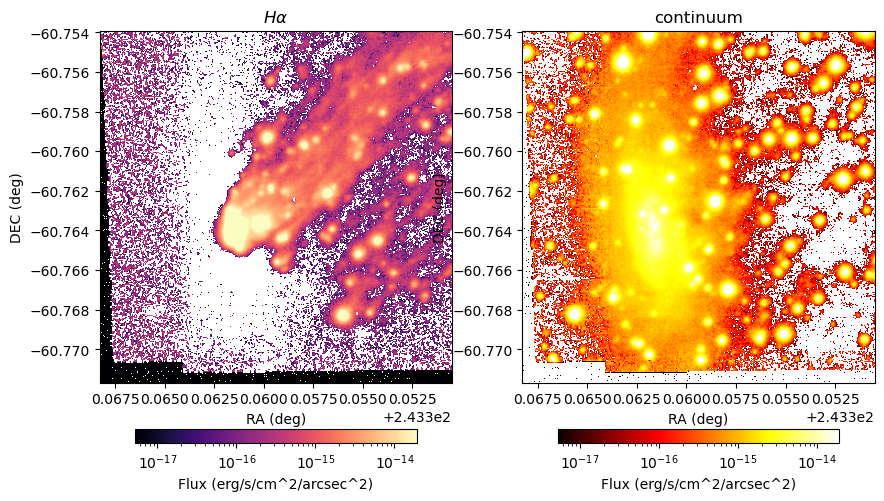

In [6]:
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Plotting the integrated Ha

# Define color normalization for logarithmic scaling or for linear scaling
norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))
#norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_Ha, 0.99))

cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_title("$H\\alpha$")
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha

norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))
#norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_continuum_near_Ha, 0.99))

im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_title("continuum")
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.8, pad = 0.06)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.8, pad = 0.06)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  


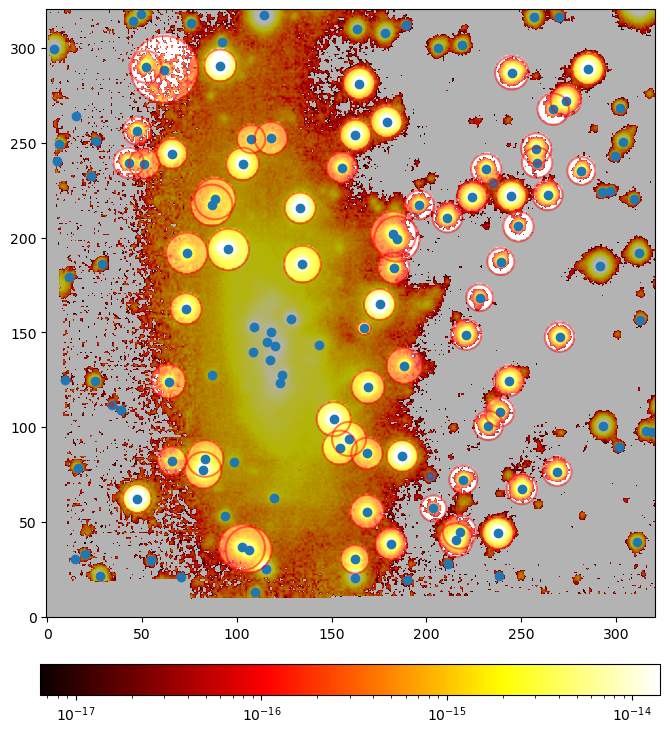

In [7]:
# remove foreground stars

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size for better appearance

# Plotting the integrated continuum near Ha

norm = LogNorm(np.nanquantile(integrated_continuum_near_Ha[integrated_continuum_near_Ha>0], 0.01), vmax=np.nanquantile(integrated_continuum_near_Ha, 0.99))
#norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_continuum_near_Ha, 0.99))

star_mask = np.zeros_like(integrated_continuum_near_Ha, dtype=bool)

from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from astropy.modeling import models, fitting

# Estimate the background noise
#mean, median, std = integrated_continuum_near_Ha.mean(), integrated_continuum_near_Ha.median(), mad_std(integrated_continuum_near_Ha)
median = np.median(integrated_continuum_near_Ha)
#std = np.std(integrated_continuum_near_Ha)

# Detect stars
daofind = DAOStarFinder(fwhm=3.0, threshold=4*median)  # fwhm and threshold are tunable
sources = daofind(integrated_continuum_near_Ha)# - median)

im1 = ax.imshow(integrated_continuum_near_Ha-median, origin='lower', cmap='hot', norm=norm) # extent=[ra_min, ra_max, dec_min, dec_max]
cbar0 = fig.colorbar(im1,ax=ax, location='bottom', shrink=0.8, pad = 0.06)

x = sources['xcentroid']
y = sources['ycentroid']

# Convert to a list of (x, y) tuples
positions = list(zip(x, y))
ax.scatter(x,y)

for x,y in positions:
    l = 30
    image = integrated_continuum_near_Ha-median
    if l < x < integrated_continuum_near_Ha.shape[1]-l and l < y < integrated_continuum_near_Ha.shape[0]-l:
                
        rectangle = image[int(y-l):int(y+l), int(x-l):int(x+l)] 
        y_grid, x_grid = np.mgrid[:rectangle.shape[0], :rectangle.shape[1]]
        g_init = models.Gaussian2D(amplitude=rectangle.max(), x_mean=l, y_mean=l, x_stddev=5, y_stddev=5)
        fit = fitting.LevMarLSQFitter()
        g_fit = fit(g_init, x_grid, y_grid, rectangle)
                            
        refined_x = x - l + g_fit.x_mean.value
        refined_y = y - l + g_fit.y_mean.value
                
        sigma_x, sigma_y = g_fit.x_stddev.value, g_fit.y_stddev.value
        fwhm = (2.355 * sigma_x + 2.355 * sigma_y)/2
        
        if fwhm < 20:
            aperture = CircularAperture((x,y), r=2*fwhm)
            aperture.plot(color='red', lw=1.5, alpha=0.5)
            mask = aperture.to_mask(method='center')
            star_mask |= mask.to_image(integrated_continuum_near_Ha.shape).astype(bool)

ax.imshow(star_mask, origin='lower', alpha=0.3, cmap='gray')  # Overlay mask

plt.show()

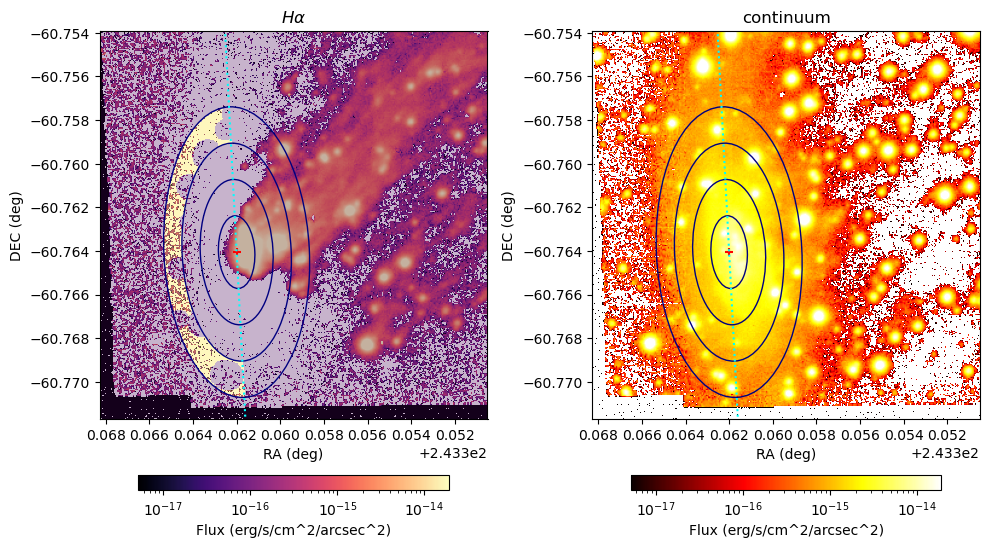

In [8]:
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.patches import Ellipse
import matplotlib.path as mpath

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Adjust the size for better appearance
ax = ax.flatten()

# Plotting the integrated Ha

# Define color normalization for logarithmic scaling or for linear scaling
norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))
#norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_Ha, 0.99))

cmap = plt.cm.magma
cmap.set_bad(color='white')
im0 = ax[0].imshow(integrated_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap=cmap, norm=norm)
ax[0].set_title("$H\\alpha$")
ax[0].set_xlabel("RA (deg)")  # Label for X-axis
ax[0].set_ylabel("DEC (deg)")  # Label for Y-axis

# Plotting the integrated continuum near Ha

norm = LogNorm(np.nanquantile(integrated_Ha[integrated_Ha>0], 0.01), vmax=np.nanquantile(integrated_Ha, 0.99))
#norm = Normalize(vmin=0, vmax=np.nanquantile(integrated_continuum_near_Ha, 0.99))

im1 = ax[1].imshow(integrated_continuum_near_Ha, extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', cmap='hot', norm=norm)
ax[1].set_title("continuum")
ax[1].set_xlabel("RA (deg)")  # Label for X-axis
ax[1].set_ylabel("DEC (deg)")  # Label for Y-axis

cbar0 = fig.colorbar(im0, ax=ax[0], location='bottom', shrink=0.8, pad = 0.06)
cbar1 = fig.colorbar(im1, ax=ax[1], location='bottom', shrink=0.8, pad = 0.06)

cbar0.set_label("Flux (erg/s/cm^2/arcsec^2)")  
cbar1.set_label("Flux (erg/s/cm^2/arcsec^2)")  

#####

#center = (243.363771, -60.764053)  # Center of the galaxy (reference coordinates)
center = (243.362, -60.764053)  # Center of the galaxy (reference coordinates)
ax[0].scatter(center[0], center[1], marker='+', c='red')
ax[1].scatter(center[0], center[1], marker='+', c='red')

angle = 87  # Angle of tilt in degrees

x = np.linspace(0,290)
m_semimajor_axis = np.tan(np.radians(angle))
y =  m_semimajor_axis * (x - center[0]) + center[1]
ax[0].plot(x,y,linestyle=':',c='cyan')
ax[1].plot(x,y,linestyle=':',c='cyan')

e = np.sqrt(1-0.5**2)
width = 30 * cdelt1
n = 5

# Create ellipses and add them to the plot
for i in range(1, n):
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2) 
    
    for k in range(2):
        ellipse = Ellipse(center, a*2, b*2, angle=angle, edgecolor='navy', facecolor='none')
        ax[k].add_patch(ellipse)


# masks

# Generate the coordinate grid
y_coords, x_coords = np.meshgrid(np.linspace(dec_min, dec_max, integrated_Ha.shape[0]),
                                 np.linspace(ra_min, ra_max, integrated_Ha.shape[1]),
                                 indexing='ij')
left_mask = (y_coords < m_semimajor_axis * (x_coords - center[0]) + center[1])

# Flatten coordinates for easier processing
points = np.vstack((x_coords.ravel(), y_coords.ravel())).T

masks = []

for i in range(1, n):

    mask = np.zeros_like(integrated_Ha, dtype=bool)
    
    # external ellipse
    a = width * i                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_ext = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # internal ellipse
    a = width * (i-1)                # semimajor axis
    b = a * np.sqrt(1-e**2)   

    # Generate ellipse vertices
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)
    cos_angle, sin_angle = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    x_rot = ellipse_x * cos_angle - ellipse_y * sin_angle
    y_rot = ellipse_x * sin_angle + ellipse_y * cos_angle
    vertices_int = np.column_stack([x_rot + center[0], y_rot + center[1]])

    # Create paths for the ellipses
    path_ext = mpath.Path(vertices_ext)
    path_int = mpath.Path(vertices_int)

    # Mask points within the external but outside the internal ellipse
    mask_ext = path_ext.contains_points(points).reshape(mask.shape)
    mask_int = path_int.contains_points(points).reshape(mask.shape)
    
    mask |= (mask_ext & ~mask_int & left_mask & ~star_mask)
    
    masks.append(mask)
    
ax[0].imshow(masks[3], extent=[ra_min, ra_max, dec_min, dec_max], origin='lower', interpolation='none', alpha=0.3) #cmap=cmaps[i-1]

for k in range(2):
    ax[k].set_xlim(ra_min,ra_max)
    ax[k].set_ylim(dec_min,dec_max)
    #ax[k].set_xlim(194.5+0.03,194.5+0.022)
    #ax[k].set_ylim(28.235,28.243)
    #ax[k].grid()


# Adjusting layout to make it fit better
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the tight_layout to leave space for colorbars
plt.show()



In [9]:
spectra_region = []
var_region = []
snr = []

for i,mask in enumerate(masks):
    n = len(mask[mask==True])
    # Sum the spectra for the region defined by the mask (sum over the spatial axes)
    spectra_region.append(np.nansum(cube[:, mask], axis=1) / n)
    var_region.append(np.nansum(var[:, mask], axis=1) / n**2)
    snr.append(spectra_region / np.sqrt(var_region))
    

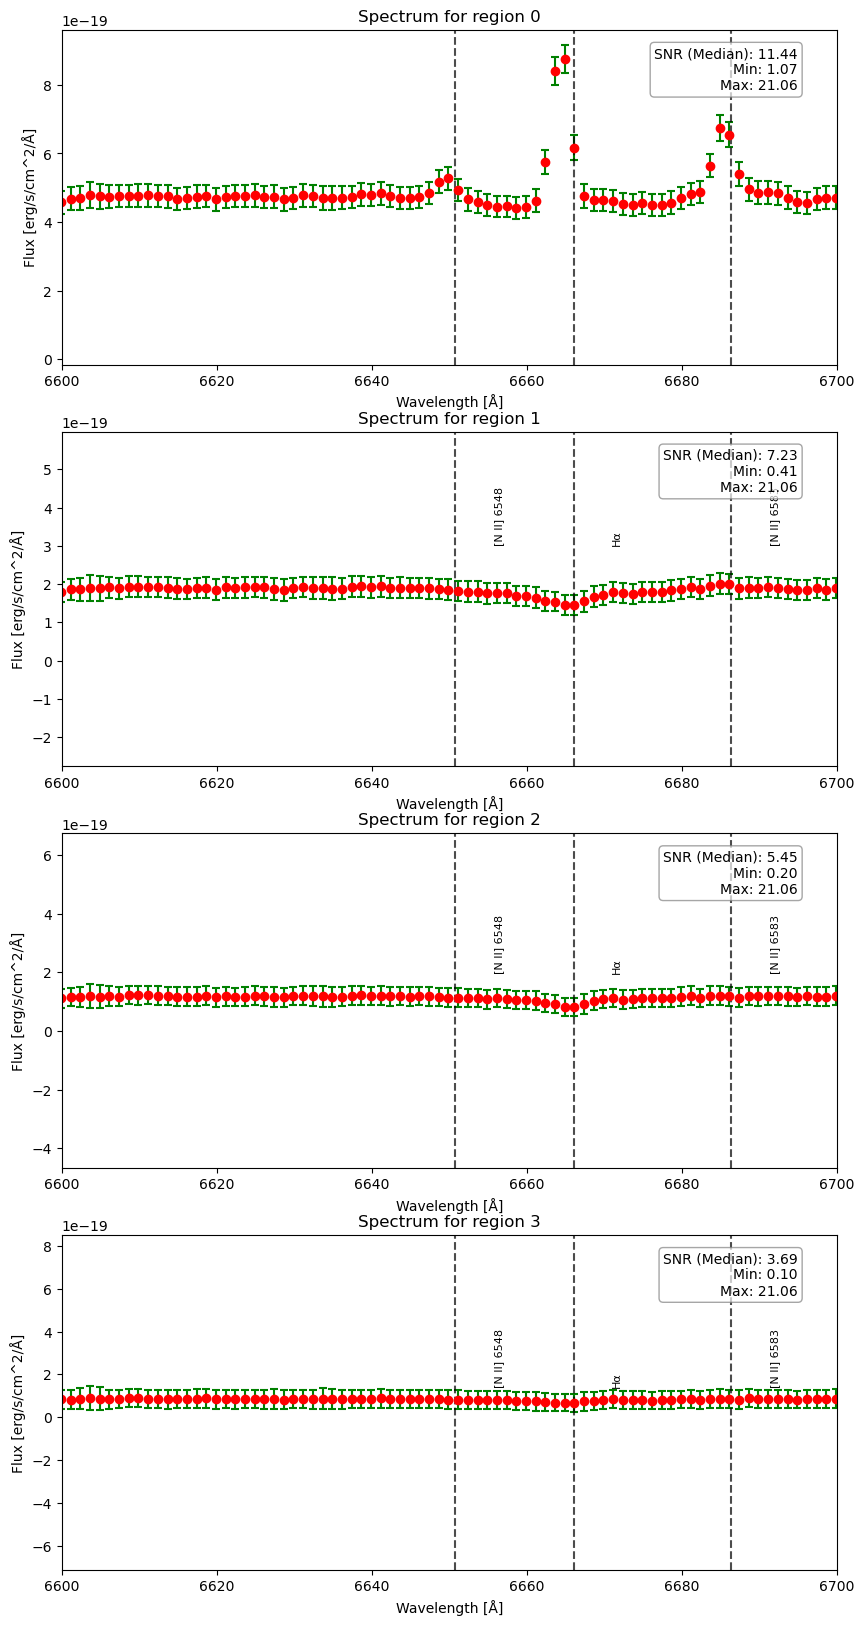

In [118]:
fig,ax= plt.subplots(4,1,figsize=(10,20))
ax = ax.flatten()

for i,mask in enumerate(spectra_region):

    ax[i].errorbar(w, spectra_region[i] * cube_units, yerr=np.sqrt(var_region[i] * var_units), fmt='o', color='red', ecolor='green', elinewidth=1.5, capsize=3, capthick=1.5)

    snr_median = np.nanmedian(snr[i])
    snr_min = np.nanmin(snr[i])
    snr_max = np.nanmax(snr[i])
    
    # Add text to the upper right of the plot
    ax[i].text(
        0.95, 0.95, 
        f"SNR (Median): {snr_median:.2f}\nMin: {snr_min:.2f}\nMax: {snr_max:.2f}",
        ha='right', va='top', 
        transform=ax[i].transAxes, 
        fontsize=10, bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white', alpha=0.7)
    )

    # Add vertical dashed lines for spectral features
    max = np.max(spectra_region[i]*cube_units)
    for name, wavelength in redshifted_lines.items():
        ax[i].axvline(wavelength, color="black", linestyle="dashed", alpha=0.7)
        ax[i].text(wavelength + 5, max * 1.3, name, 
                 rotation=90, verticalalignment="bottom", fontsize=8, zorder=1, clip_on=True)
    
    ax[i].set_xlim(6600,6700)
    #ax[i].set_xlim(4800,5200)
    ax[i].set_xlabel("Wavelength [Å]")
    ax[i].set_ylabel("Flux [erg/s/cm^2/Å]")
    ax[i].set_title(f"Spectrum for region {i:.0f}")

